# Import

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal, stats
import scipy.fftpack
from cycler import cycler

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
#%matplotlib notebook

# Reading files

In [3]:
def read_table(folder, sca, quantity) :
    file = common_folder + "solver_" + quantity + "_scalar" + "%01d" % sca + ".out"
    file_list = []
    print(file)
    for line in open(file) :
        temp_array_line = []
        try :
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                file_list.append(temp_array_line)
        except :
            print('error')
    file_array = np.array(file_list[0:-1])
    return file_array

In [4]:
# common_folder = "/home/gorbunov8a/CODE/random_advection_test/e43/init0/"
# common_folder = "/home/gorbunov8a/CODE/random_advection_test/time_corr/gaussian/"
common_folder = "/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/"

#quantities = ['dissipation', 'energy', 'transfer', 'forcing']
quantities = ['energy']
nb_scal = 7
N = 65
eps = 4/3

In [5]:
table = read_table(common_folder, 1, quantities[0])
dissipation = np.zeros([nb_scal, table.shape[0], table.shape[1]])
transfer = np.zeros([nb_scal, table.shape[0], table.shape[1]])
forcing_power = np.zeros([nb_scal, table.shape[0], table.shape[1]])
spectrum = np.zeros([nb_scal, table.shape[0], table.shape[1]])

/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar1.out


In [6]:
for sca in list(range(nb_scal)) :
    #dissipation[sca,:,:] = read_table(common_folder, sca+1, 'dissipation')[:table.shape[0], :table.shape[1]]
    #transfer[sca,:,:] = read_table(common_folder, sca+1, 'transfer')[:table.shape[0], :table.shape[1]]
    spectrum[sca,:,:] = read_table(common_folder, sca+1, 'energy')[:table.shape[0], :table.shape[1]]
    #forcing_power[sca,:,:] = read_table(common_folder, sca+1, 'forcing')[:table.shape[0], :table.shape[1]]

/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar1.out
/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar2.out
/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar3.out
/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar4.out
/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar5.out
/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar6.out
/home/gorbunov8a/data/random_advection/kareline_test/e43/N256/u4/init0/solver_energy_scalar7.out


# Parameters

In [7]:
k = np.arange(table.shape[1])

In [8]:
# Plotting options
plt.rc('axes', labelsize=14)  
plt.rc('axes', titlesize=14)  
plt.rc('legend', fontsize=12)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [9]:
kmin = 1
kmax = np.max(k)
nb_of_curves = 10
step = round((kmax - kmin)/nb_of_curves)
indices_of_k_to_plot = np.arange(kmin,kmax,step, dtype=np.int16)
print(indices_of_k_to_plot)

[  1  14  27  40  53  66  79  92 105 118]


In [10]:
normalization_status = True
k_norm_coef = 1.0

# Plot time series

In [11]:
total_dissipation_time = np.sum(dissipation, axis=2)
total_transfer_time = np.sum(transfer, axis=2)
total_energy_time = np.sum(spectrum, axis=2)
total_forcing_time = np.sum(forcing_power, axis=2)

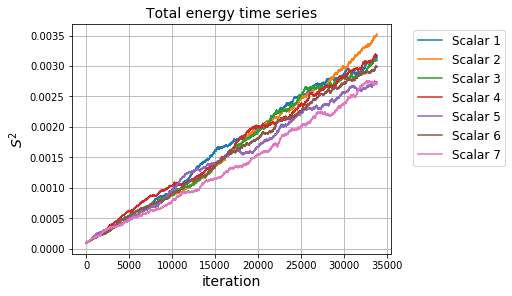

In [12]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(7,4))

for sca in list(range(nb_scal)) :
    ax.plot(total_energy_time[sca,:], label='Scalar %01d' % (sca + 1))
ax.set(xscale='linear', yscale='linear', xlabel='iteration', ylabel=r'$S^2$', title='Total energy time series'); ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

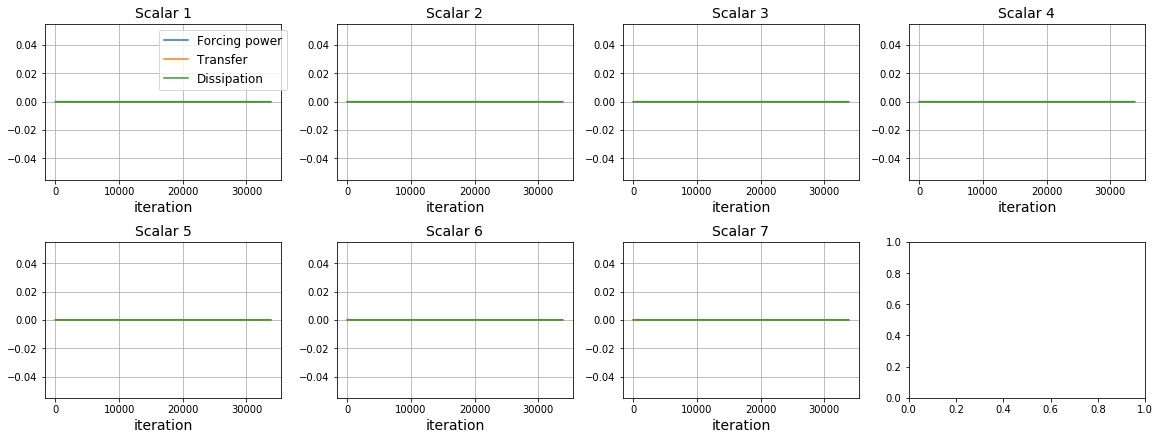

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=4, constrained_layout=True,figsize=(16,6), squeeze=False)
time_slice = np.s_[10:]
for sca in list(range(nb_scal)) :
    row = sca//4; col = sca - (row*4)
    ax[row,col].plot(total_forcing_time[sca,time_slice], '-', label=r'Forcing power')
    ax[row,col].plot(total_transfer_time[sca,time_slice], '-', label=r'Transfer')
    ax[row,col].plot(total_dissipation_time[sca,time_slice], '-', label=r'Dissipation')
    ax[row,col].set(xscale='linear', yscale='linear', xlabel=r'iteration', title=r'Scalar %01d' % (sca+1)); 
    ax[row,col].grid()
ax[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [14]:
# # linear trand by scales
# lin_trend = np.zeros_like(k, dtype=float)
# intercept = np.zeros_like(k, dtype=float)
# for ik in list(range(len(k))): lin_trend[ik], intercept[ik], r_value, p_value, std_err = stats.linregress(time,energy[:,ik]/np.mean(energy[:,ik]))
    
# fig, ax = plt.subplots(constrained_layout=True)
# ax.plot(k, lin_trend, '.-')
# ax.set(xscale='log', yscale='linear', xlabel='k', ylabel='slope', title='Time linear trend'); ax.grid()
# plt.show()

# Spectra

In [15]:
# time_slice = np.s_[:,-100:-1,:]
# avg_spec_enegy = np.mean(spectrum[time_slice], axis=1)

# fig, ax = plt.subplots(constrained_layout=True, figsize=(7,4))
# for sca in list(range(nb_scal)) :
#     ax.plot(k,avg_spec_enegy[sca,:], label='Scalar %01d' % (sca + 1))
# ax.set(xscale='log', yscale='log', xlabel='k', ylabel=r'$S^2$', title='Spectrum average'); ax.grid()
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# #ax.set(ylim=[10e-15,10e-4])
# plt.show()

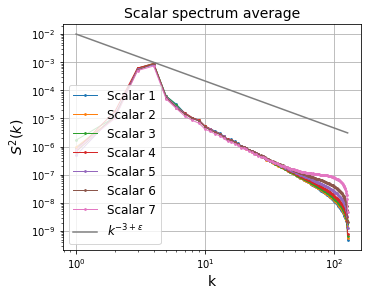

In [16]:
time_slice = np.s_[:,800:-1,:]
avg_spec_enegy = np.mean(spectrum[time_slice], axis=1)

fig, ax = plt.subplots(constrained_layout=True, figsize=(5,4))
for sca in list(range(nb_scal)) :
    ax.plot(k[1:],avg_spec_enegy[sca,1:], '.-',label='Scalar %01d' % (sca + 1), lw=1.0, markersize=3.5)
ax.plot(k[1:], 10e-3*k[1:]**(-3+eps), label=r'$k^{-3+\epsilon}$')
#ax.plot(k,2e-5*np.ones_like(k), 'k--', lw=2.0)
ax.set(xscale='log', yscale='log', xlabel='k', ylabel=r'$S^2(k)$', title='Scalar spectrum average'); ax.grid()
lgd = ax.legend(loc='best')
#ax.set(ylim=[10e-15,10e-4])
# pp = PdfPages('Images/Scalar/spec_scalar_compens_eps05_N256_from_solver.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()
#plt.show()

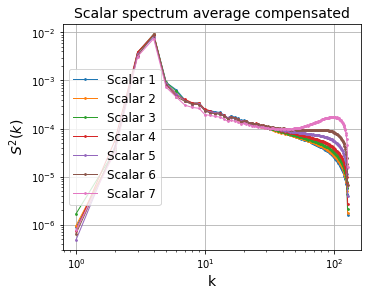

In [17]:
avg_spec_enegy = np.mean(spectrum[time_slice], axis=1)

fig, ax = plt.subplots(constrained_layout=True, figsize=(5,4))
for sca in list(range(nb_scal)) :
    ax.plot(k[1:],avg_spec_enegy[sca,1:]/k[1:]**(-3+eps), '.-',label='Scalar %01d' % (sca + 1), lw=1.0, markersize=3.5)
#ax.plot(k,2e-5*np.ones_like(k), 'k--', lw=2.0)
ax.set(xscale='log', yscale='log', xlabel='k', ylabel=r'$S^2(k)$', title='Scalar spectrum average compensated'); ax.grid()
lgd = ax.legend(loc='best')
#ax.set(ylim=[10e-15,10e-4])
# pp = PdfPages('Images/Scalar/spec_scalar_compens_eps05_N256_from_solver.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()
#plt.show()

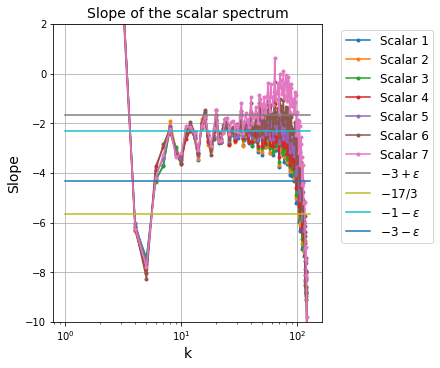

In [18]:
# check the slope of the mean energy
resampling = 1
x = np.log(k[1::resampling])
slope_avg = np.gradient(np.log(avg_spec_enegy[:,1::resampling]), x, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5), constrained_layout=True)
for sca in list(range(nb_scal)) :
    ax.plot(np.exp(x), slope_avg[sca,:], '.-', label='Scalar %01d' % (sca + 1))
ax.plot(np.exp(x), np.full_like(x, (-3.0+eps), dtype=float), '-', label=r'$-3+\epsilon$')
ax.plot(np.exp(x), np.full_like(x, (-17/3), dtype=float), '-', label=r'$-17/3$')
ax.plot(np.exp(x), np.full_like(x, (-1.0-eps), dtype=float), '-', label=r'$-1-\epsilon$')
ax.plot(np.exp(x), np.full_like(x, (-3.0-eps), dtype=float), '-', label=r'$-3-\epsilon$')

ax.set(xscale='log', yscale='linear', title='Slope of the scalar spectrum', xlabel='k', ylabel='Slope'); ax.grid()
ax.set(ylim=[-10,2])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/home/gorbunov8a/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  # This is added back by InteractiveShellApp.init_path()


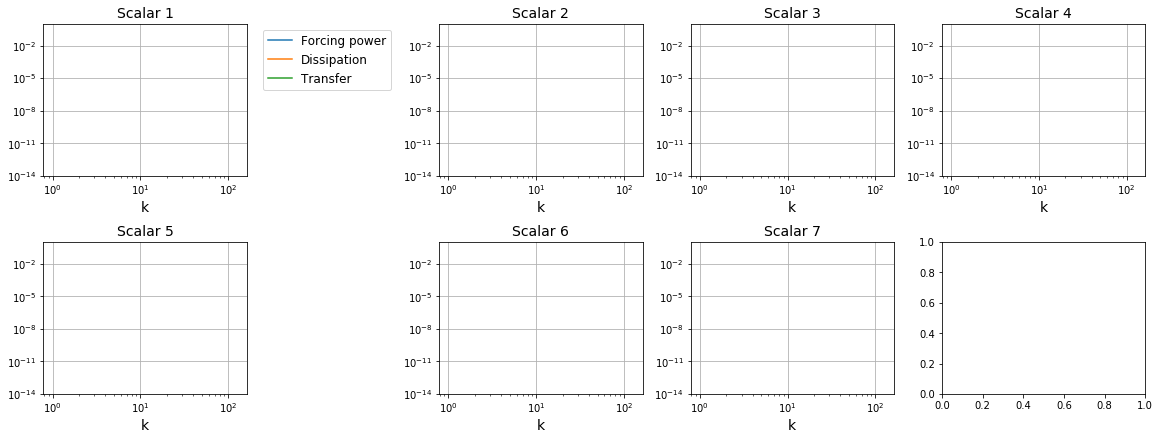

In [19]:
avg_spec_dissipation = np.mean(dissipation[time_slice], axis=1)
avg_spec_forcing = np.mean(forcing_power[time_slice], axis=1)
avg_spec_transfer = np.mean(transfer[time_slice], axis=1)

fig, ax = plt.subplots(nrows=2, ncols=4, constrained_layout=True,figsize=(16,6), squeeze=False)
for sca in list(range(nb_scal)) :
    row = sca//4; col = sca - (row*4)
    ax[row,col].plot(k, avg_spec_forcing[sca,:], '-', label=r'Forcing power')
    ax[row,col].plot(k, avg_spec_dissipation[sca,:], '-', label=r'Dissipation')
    ax[row,col].plot(k, np.abs(avg_spec_transfer[sca,:]), '-', label=r'Transfer')
    ax[row,col].set(xscale='log', yscale='log', xlabel=r'k', title=r'Scalar %01d' % (sca+1));
    ax[row,col].set(ylim=[10e-15,10e-1])
    ax[row,col].grid()
ax[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# PDF

In [20]:
# #plot histogram
# nb_of_bins=20

# for ik in indices_of_k_to_plot :
#     plt.hist(x=energy[:,ik]*norm_coef[ik], bins=nb_of_bins, histtype='step', density=True, log=True, align='mid', label='k=%2.f' % (k[ik]/k_norm_coef))
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('PDF of scalar sqr')
# plt.xlabel('bin (normalized)'); plt.ylabel("PDF")
# plt.show()